In [2]:
import numpy as np
import matplotlib.pyplot as plt

# LAB 5: Least Squares 

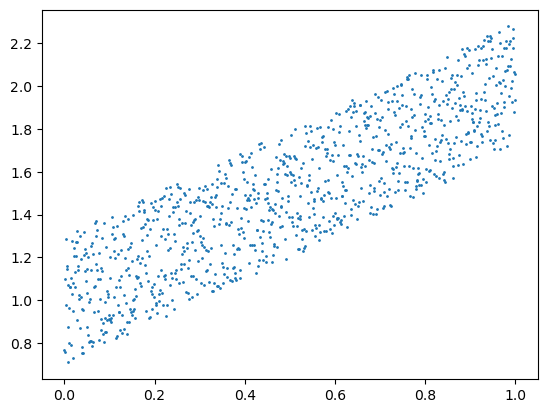

In [36]:
### generating random data by randomly shifting points on a line 
w      = 0.3
n_data = 1000

y      = lambda x : x + 1 # one liner function using lambda operator (lambda args : f(args))
X      = np.linspace(0, 1, n_data)
Y      = y(X) + (2*w*np.random.rand(n_data)-w) # shift line y(x) 

plt.scatter(X, Y, s=1) 

### Least squares

Our goal is to <i>approximate</i> the solution for an overdetermined linear system (more equations (rows) than variables (colums)). 
$$
A x = y.
$$
For an approximation $\hat{x}$, consider the squared-error
$$
\begin{eqnarray}
e &=& ||y - A \hat{x}||^2 \\
  &=& (y - A \hat{x})^t (y - A \hat{x}) \\
  &=& (y^t - \hat{x}^t A^t) (y - A \hat{x}) \\
  &=&  y^t y - A^t y \hat{x} - \hat{x}^t A^t y + \hat{x}^t A^t A \hat{x}.
\end{eqnarray}
$$
In order to minimize the error, take the derivative and set it to zero 
$$
\begin{eqnarray}
\frac{\partial e}{\partial \hat{x}} &=& 0 \\ 
-A^t y - A^t y + 2 A^t A \hat{x}&=& 0  \\
A^t A \hat{x}&=&  A^t y.
\end{eqnarray}
$$
We know that $A^t A$ is a square symmetric matrix. But more importantly, $A^t A$ is <i>positive semi-definite</i>, which means that it is invertible! This fact allows us to solve for $\hat{x}$ 
$$
\begin{eqnarray}
\hat{x} = (A^t A)^{-1} A^t y.
\end{eqnarray}
$$
Implemented below - 

In [37]:
def least_squares(X, y, order=2):    
    A = np.array([X**i for i in range(order+1)]).T 
    x = np.linalg.inv(A.T @ A) @ (A.T @ y)
    return x

This can be further simplified with the QR factorization of $A$ (LU decomposition for symmetric matrices). 

><b>QR Decomposition - </b> $A = QR$, where
>1. $Q$ is an orthogonal matrix $\implies Q^t = Q^{-1} \implies Q Q^t = Q^t Q = I$.
>2. $R$ is an upper triangular matrix (may or may not have an inverse).

Substitute $QR$ factorization into solution
$$
\begin{eqnarray}
\hat{x} &=& (A^t A)^{-1} A^t y \\
        &=& ((Q R)^t Q R)^{-1} (Q R)^t y \\
        &=& (R^t Q^t Q R)^{-1} (R^t Q^t) y \\ 
        &=& (R^t R)^{-1} (R^t Q^t) y \\ 
        &=& R^{-1} R^{-t} R^t Q^t y \\ 
        &=& R^{-1} Q^{t} y.
\end{eqnarray}
$$
implemented below- 

In [38]:
# you can also decompose further using QR factorization (you probably want to add some exception handling if R is invertiblef)
def least_squares_qr(X, y, order=2):    
    A    = np.array( [X**i for i in range(order+1)] ).T
    Q, R = np.linalg.qr(A)
    x    = np.linalg.inv(R) @ Q.T @ y
    return x

Err:  0.11710715414853283


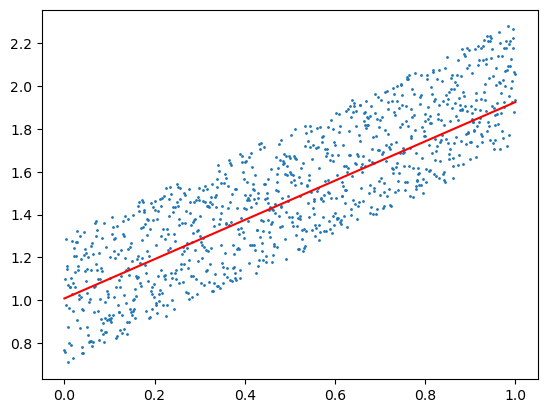

In [39]:
# generate some random data by randomly shifting points on a line 
sol     = least_squares(X, Y, order=2)

plt.scatter(X, Y, s=1)

x = np.linspace(0, 1, 1000)
y = sol[1]*x + sol[0]
plt.plot(x, y, c='r')

print("Err: ", np.linalg.norm(y - Y)/np.linalg.norm(Y))

### Higher Order  (3rd order data)

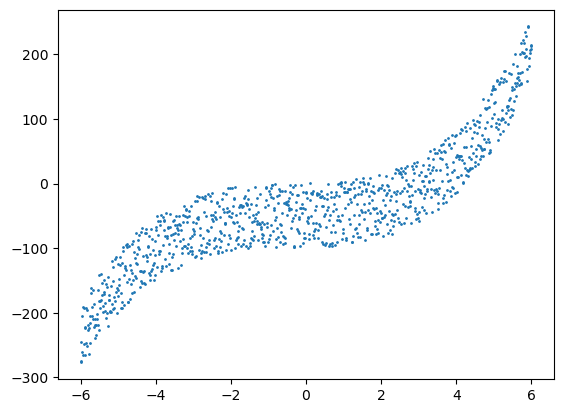

In [46]:
# generate random points around this cubic polynomial
y = lambda x : x**3 + x**2 + x + 1 

n_data = 1000
w      = 100 # width to randomly shift points

X  = np.linspace(-6, 6, 1000)
Y  = y(X) + w*np.random.rand(n_data)-w

plt.scatter(X, Y, s=1)

In [47]:
sol1 = least_squares_qr(X, Y, order=1)
sol2 = least_squares_qr(X, Y, order=2)
sol3 = least_squares_qr(X, Y, order=3)

Err ord 1:  0.5131625003316898
Err ord 2:  0.4980039930847117
Err ord 3:  0.3139570403649425


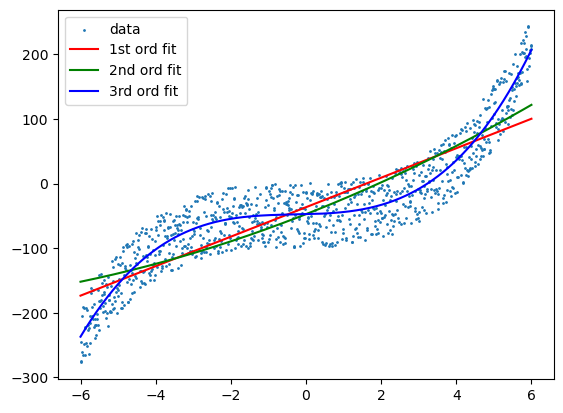

In [48]:
x  = np.linspace(-6, 6, 1000)

y3 = sol3[3]*(X**3) + sol3[2]*(X**2) + sol3[1]*X + sol3[0]
y2 =                  sol2[2]*(X**2) + sol2[1]*X + sol2[0]
y1 =                                   sol1[1]*X + sol1[0]

plt.scatter(X, Y, s=1)        
plt.plot(X, y1, color='r')
plt.plot(X, y2, color='g')
plt.plot(x, y3, color='b')

plt.legend(['data', '1st ord fit', '2nd ord fit', '3rd ord fit'])

print("Err ord 1: ", np.linalg.norm(y1 - Y) / np.linalg.norm(y1))
print("Err ord 2: ", np.linalg.norm(y2 - Y) / np.linalg.norm(y2))
print("Err ord 3: ", np.linalg.norm(y3 - Y) / np.linalg.norm(y3))

Apologies for the inconvenience. Let me correct that:

To derive the relation between the Frobenius norm of a matrix \( A \) and its singular values, let's start with the definition of the Frobenius norm:

\[
\|A\|_F = \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n} |a_{ij}|^2}
\]

Where \( a_{ij} \) represents the elements of the matrix \( A \).

Now, let's express the matrix \( A \) using its Singular Value Decomposition (SVD):

\[
A = U \Sigma V^T
\]

Where:
- \( U \) is an \( m \times m \) orthogonal matrix.
- \( \Sigma \) is an \( m \times n \) diagonal matrix containing the singular values (\( \sigma_1, \sigma_2, \ldots, \sigma_r \), where \( r = \min(m, n) \)).
- \( V \) is an \( n \times n \) orthogonal matrix.

Using this SVD representation, we can compute the Frobenius norm of \( A \) as follows:

\[
\begin{align*}
\|A\|_F^2 &= \sum_{i=1}^{m} \sum_{j=1}^{n} |a_{ij}|^2 \\
&= \sum_{i=1}^{m} \sum_{j=1}^{n} |(U \Sigma V^T)_{ij}|^2 \\
&= \sum_{i=1}^{m} \sum_{j=1}^{n} |(U \Sigma)_{ij} (V^T)_{ji}|^2 \\
&= \sum_{i=1}^{m} \sum_{j=1}^{n} |(U \Sigma)_{ij}|^2 \cdot |(V^T)_{ji}|^2 \\
&= \sum_{i=1}^{m} \sum_{j=1}^{n} |(U \Sigma)_{ij}|^2 \cdot |V_{ij}|^2 \\
&= \sum_{i=1}^{m} \sum_{j=1}^{n} |(\Sigma)_{ij}|^2 \\
&= \sum_{i=1}^{r} \sigma_i^2
\end{align*}
\]

where \( r = \min(m, n) \).

Finally, taking the square root of both sides yields:

\[
\|A\|_F = \sqrt{\sum_{i=1}^{r} \sigma_i^2}
\]

This confirms the relation between the Frobenius norm of \( A \) and its singular values.

In [65]:
A = np.random.rand(5, 1) @ np.random.rand(1, 5) # thats right! the outer product of two vectors is a singular matrix 
np.linalg.cond(A)

1.1680017256384414e+33

Since there are infinitely many possible values of the vector $x$, it is extremely inefficient to directly compute the condition number. Therefore it is approximated using a method that you will learn later in this class (Singular Value Decomposition). 